In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import seaborn as sns
from PyEMD import EMD, EEMD, CEEMDAN

%matplotlib inline
plt.rc('font',family='Arial') 
plt.style.use("ggplot")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
font_T = fm.FontProperties(family='Arial', size=24, stretch=0, weight='bold')
font_T_small = fm.FontProperties(family='Arial', size=15, stretch=0)
font_T_mini = fm.FontProperties(family='Arial', size=12, stretch=0)


# 导入数据

In [4]:
# 载入时间序列数据
data = pd.read_csv('Amazon16-21.csv', usecols=[1])
S = data.values[:, 0]
t = np.arange(0, len(S), 1)  # 横轴的取值范围

# EMD分解

In [3]:
# 获得分量+残余分量
emd = EMD()
emd.emd(S)
IMFs, res = emd.get_imfs_and_residue()
nIMFs = IMFs.shape[0]+1  # 子序列的个数

# 保存分解结果
IMFs_df = pd.DataFrame(IMFs.T, columns=['imf'+str(i+1) for i in range(nIMFs-1)])
res_df = pd.DataFrame(data=res, columns=['res'])
emd_df = pd.concat([IMFs_df, res_df], axis=1)
emd_df.to_csv('EMD_result.csv', index=False)
emd_df

,imf1,imf2,imf3,imf4,imf5,imf6,imf7,res
0,8.891274,1.782022,24.523783,38.524192,30.086251,-53.002230,-141.789812,748.704491
1,2.353553,-4.637073,26.211718,39.135302,30.205169,-53.278508,-141.957953,748.877765
2,0.527124,-8.430064,24.493711,39.594222,30.189939,-53.515848,-142.123561,749.054455
3,-3.887865,-9.563286,20.304827,39.875208,30.037117,-53.713930,-142.286629,749.234559
4,-5.231304,-7.870945,14.454003,39.942971,29.747219,-53.872856,-142.447151,749.418077
...,...,...,...,...,...,...,...,...
1505,-24.875342,28.930103,16.879524,-115.203247,103.684685,7.736200,238.102444,3184.245633
1506,-8.695431,28.531488,20.281532,-114.491076,103.388685,8.609212,236.579358,3184.656338
1507,7.762061,-0.939047,16.686782,-112.674745,103.060650,9.522175,235.042196,3185.059948
1508,23.475573,-29.511148,7.945234,-109.791627,102.699822,10.474825,233.490860,3185.456450


In [4]:
emd_df['sum'] = emd_df.sum(1)
emd_df['raw'] = S
emd_df

,imf1,imf2,imf3,imf4,imf5,imf6,imf7,res,sum,raw
0,8.891274,1.782022,24.523783,38.524192,30.086251,-53.002230,-141.789812,748.704491,657.719971,657.719971
1,2.353553,-4.637073,26.211718,39.135302,30.205169,-53.278508,-141.957953,748.877765,646.909973,646.909973
2,0.527124,-8.430064,24.493711,39.594222,30.189939,-53.515848,-142.123561,749.054455,639.789978,639.789978
3,-3.887865,-9.563286,20.304827,39.875208,30.037117,-53.713930,-142.286629,749.234559,630.000000,630.000000
4,-5.231304,-7.870945,14.454003,39.942971,29.747219,-53.872856,-142.447151,749.418077,624.140015,624.140015
...,...,...,...,...,...,...,...,...,...,...
1505,-24.875342,28.930103,16.879524,-115.203247,103.684685,7.736200,238.102444,3184.245633,3439.500000,3439.500000
1506,-8.695431,28.531488,20.281532,-114.491076,103.388685,8.609212,236.579358,3184.656338,3458.860107,3458.860107
1507,7.762061,-0.939047,16.686782,-112.674745,103.060650,9.522175,235.042196,3185.059948,3443.520020,3443.520020
1508,23.475573,-29.511148,7.945234,-109.791627,102.699822,10.474825,233.490860,3185.456450,3424.239990,3424.239990


## 画图

C:\Users\Cooper\AppData\Local\Temp\ipykernel_16260\3014792378.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nIMFs, 1, n + 1)
C:\Users\Cooper\AppData\Local\Temp\ipykernel_16260\3014792378.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=IMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_16260\3014792378.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=IMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_16260\3014792378.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=IMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_

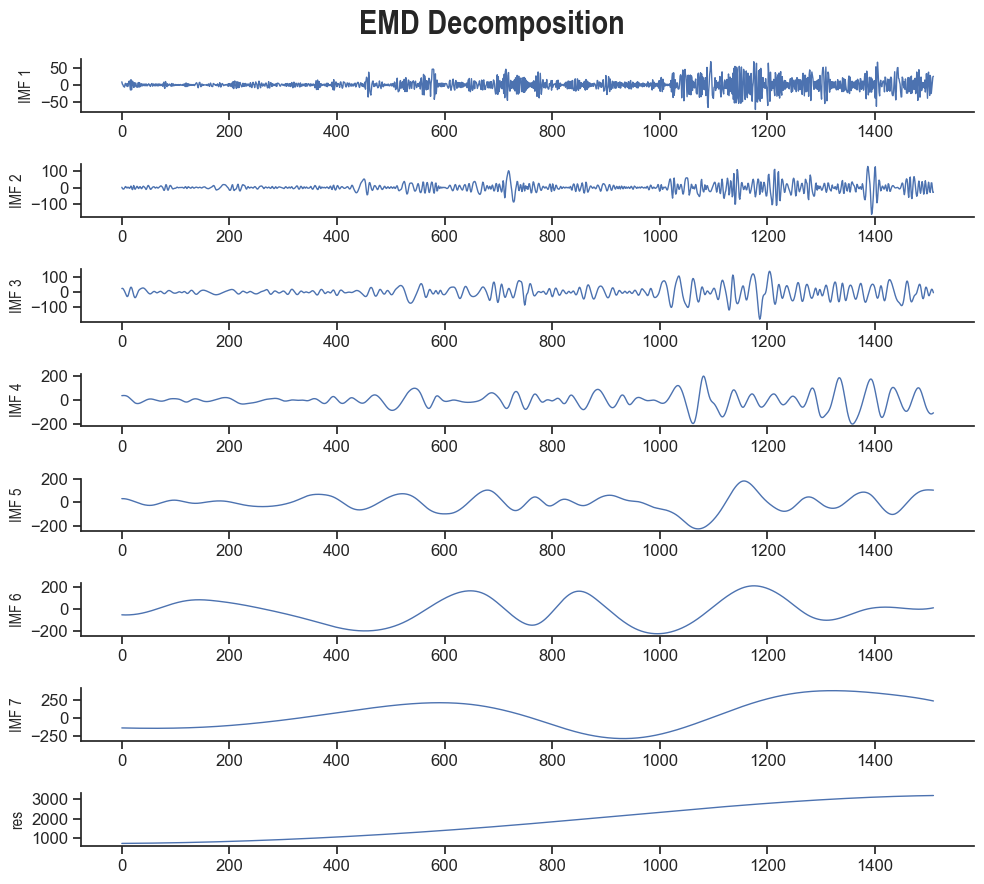

In [5]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 9))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    if n != nIMFs-1:
        sns.lineplot(data=IMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
        plt.ylabel("IMF %i" % (n + 1), fontproperties = font_T_mini)
    else:
        sns.lineplot(data=res, linewidth=1, palette=sns.color_palette("Paired")[1])
        plt.ylabel("res", fontproperties = font_T_mini)
    sns.despine()
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('EMD Decomposition', fontproperties = font_T)
plt.tight_layout()
plt.savefig('EMD_result.png', dpi=300, bbox_inches='tight')

# EEMD分解

In [10]:
# decompose
if __name__ == "__main__":   # don't skip the if __name__ == "__main__" section
    eemd = EEMD(trials=100, noise_width=0.2)  # 加入100组标准差为0.2的白噪音
    eIMFs = eemd.eemd(S, t)  # eemd分解
    nIMFs = eIMFs.shape[0]  # 子序列的个数

# 保存分解结果
eIMFs_df = pd.DataFrame(eIMFs.T, columns=['imf'+str(i+1) for i in range(nIMFs)])
eIMFs_df.to_csv('EEMD_result.csv', index=False)
eIMFs_df

,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8,imf9
0,-13.410696,56.148828,32.055609,-31.189898,-8.376934,-30.895236,-43.228658,349.483364,728.083259
1,-33.647606,22.603303,27.711986,-32.952323,-7.787792,-31.060802,-43.470696,349.345937,728.200758
2,30.919351,-2.282161,24.883641,-32.010210,-6.929593,-31.219705,-43.700314,349.213731,728.322359
3,30.559919,-9.517718,24.671218,-28.338027,-5.811657,-31.371096,-43.917406,349.086755,728.448058
4,-11.139973,-8.989832,23.615255,-22.238770,-4.467440,-31.514125,-44.121864,348.965022,728.577856
...,...,...,...,...,...,...,...,...,...
1505,-16.166319,-3.399688,7.772891,-58.443160,-14.472751,27.734863,31.442345,2124.835056,3176.035763
1506,7.336729,35.683606,-4.678538,-62.893262,-15.773264,27.407215,31.825147,2124.153977,3176.274771
1507,4.665223,35.156415,-17.513696,-67.013322,-16.568150,26.976367,32.212260,2123.463913,3176.506416
1508,-98.946431,30.575874,-26.338214,-70.116995,-16.862578,26.445550,32.603587,2122.764877,3176.730696


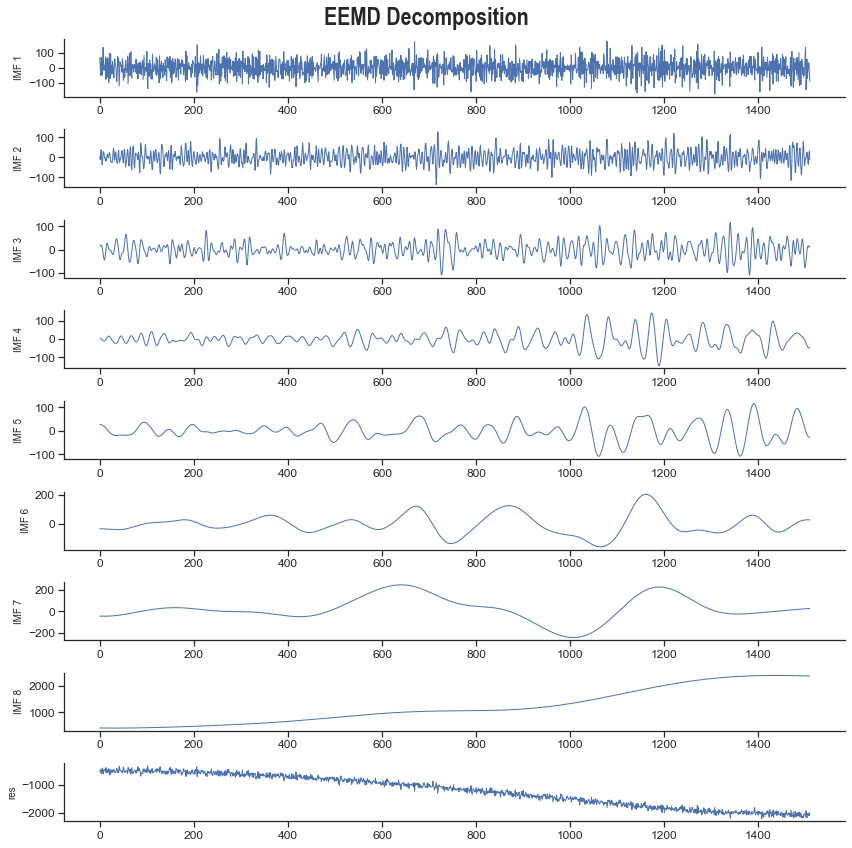

In [25]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(12, 12))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    if n != nIMFs-1:
        sns.lineplot(data=eIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
        plt.ylabel("IMF %i" % (n + 1), fontproperties = font_T_mini)
    else:
        sns.lineplot(data=res, linewidth=1, palette=sns.color_palette("Paired")[1])
        plt.ylabel("res", fontproperties = font_T_mini)
    sns.despine()
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('EEMD Decomposition', fontproperties = font_T)
plt.tight_layout()
# plt.savefig('EMD_result.png', dpi=300, bbox_inches='tight')

## 画图

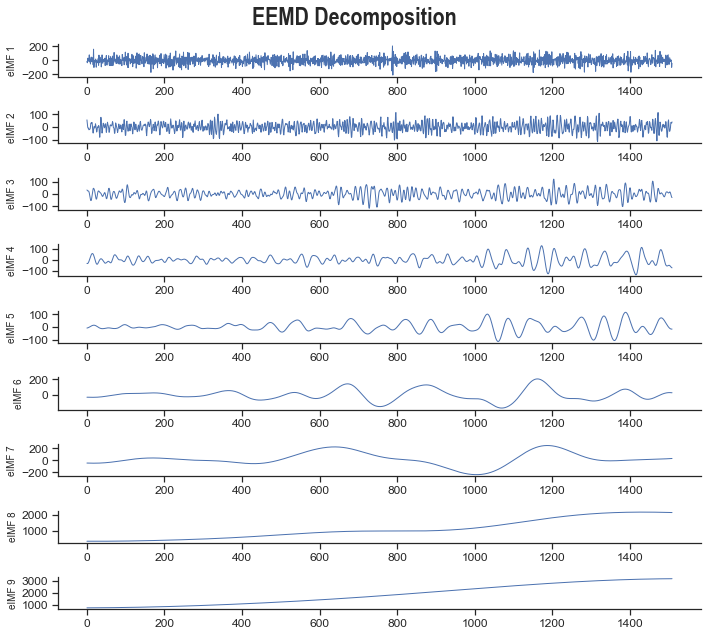

In [11]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 9))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    sns.lineplot(data=eIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
    sns.despine()
    plt.ylabel("eIMF %i" % (n + 1), fontproperties = font_T_mini)
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('EEMD Decomposition', fontproperties = font_T)
plt.tight_layout()
plt.savefig('EEMD_result.png', dpi=300, bbox_inches='tight')

# CEEMDAN分解

In [6]:
if __name__ == "__main__":
    cIMFs = CEEMDAN().ceemdan(S)
    nIMFs = cIMFs.shape[0]  # 子序列的数量

cIMFs_df = pd.DataFrame(cIMFs.T, columns=['imf'+str(i+1) for i in range(nIMFs)])
cIMFs_df.to_csv('CEEMDAN_result.csv', index=False)
cIMFs_df

,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8
0,5.610123,5.669305,10.168654,40.007533,32.247770,-80.249075,5.075660,639.190000
1,-0.758361,1.988341,8.932430,40.664644,32.431992,-80.509862,4.785211,639.375577
2,0.423701,-3.554148,6.182501,41.002175,32.413716,-80.745754,4.502256,639.565531
3,-0.588868,-7.795808,2.156754,41.007192,32.190651,-80.956643,4.226851,639.759871
4,-1.644353,-6.564575,-2.851254,40.655952,31.769043,-81.142452,3.959049,639.958605
...,...,...,...,...,...,...,...,...
1505,12.480221,4.853626,9.627290,-120.954169,103.274453,8.560502,405.642261,3016.015818
1506,29.800679,5.072220,11.403248,-120.444391,103.076889,9.783739,404.386034,3015.781689
1507,20.864446,-0.382924,9.196744,-118.722055,102.863139,11.044432,403.115978,3015.540261
1508,9.383287,-5.994596,4.598806,-115.845051,102.631659,12.342333,401.832020,3015.291531


## 画图

C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2103378048.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nIMFs, 1, n + 1)
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2103378048.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=cIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2103378048.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=cIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykernel_26580\2103378048.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=cIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
C:\Users\Cooper\AppData\Local\Temp\ipykern

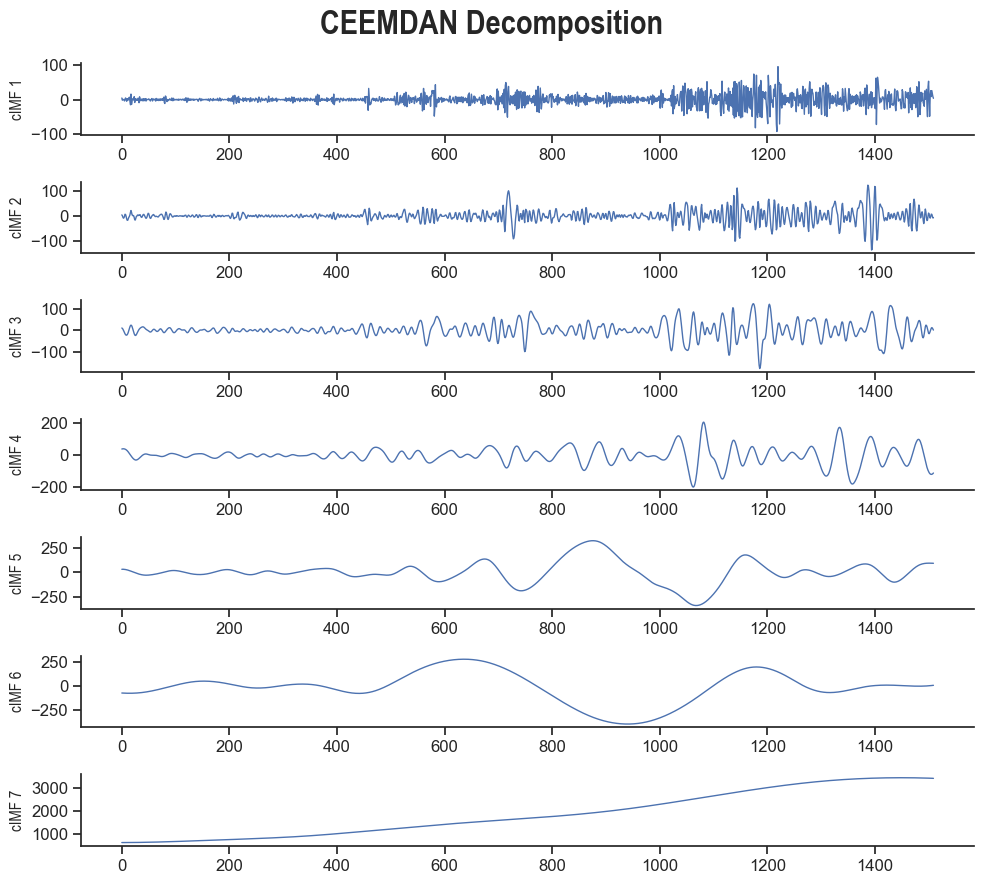

In [26]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 9))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    sns.lineplot(data=cIMFs[n], linewidth=1, palette=sns.color_palette("Paired")[1])
    sns.despine()
    plt.ylabel("cIMF %i" % (n + 1), fontproperties = font_T_mini)
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('CEEMDAN Decomposition', fontproperties = font_T)
plt.tight_layout()
plt.savefig('CEEMDAN_result.png', dpi=300, bbox_inches='tight')

# VMD vmdpy包

In [18]:
from vmdpy import VMD


K = 7  # 7 modes
alpha = 2000  # moderate bandwidth constraint
tau = 0.  # noise-tolerance (no strict fidelity enforcement)
DC = 0  # no DC part imposed
init = 1  # initialize omegas uniformly
tol = 1e-7

# Decomposed modes
u, u_hat, omega = VMD(S, alpha, tau, K, DC, init, tol)
imfs = pd.DataFrame(u).T
imfs.columns = ['imf'+str(i+1) for i in range(K)]
imfs.to_csv('VMD_result.csv', index=False)

nIMFs = imfs.shape[1]  # 子序列的数量

imfs

,imf1,imf2,imf3,imf4,imf5,imf6,imf7
0,652.584545,-57.390968,35.834411,22.028693,-1.037857,3.631470,0.490413
1,652.562812,-57.441305,35.492286,19.289671,-1.611495,0.758056,-1.263744
2,652.552292,-57.508059,34.848259,14.201119,-2.110745,-2.725137,1.478137
3,652.563927,-57.580125,33.915621,7.402478,-1.759770,-4.141191,-1.119983
4,652.565214,-57.691045,32.656687,-0.324482,-0.202474,-2.373937,0.330076
...,...,...,...,...,...,...,...
1505,3464.312505,43.330184,-85.410761,-1.561788,18.983388,7.650988,-3.379084
1506,3464.811295,44.004401,-87.852997,1.152977,12.214513,23.909987,4.565813
1507,3465.380477,44.720104,-89.358309,4.352853,1.457852,18.673890,-4.276421
1508,3465.908128,45.356298,-90.121871,7.263381,-8.867879,-2.202397,2.819718


C:\Windows\Temp\ipykernel_21148\2018214436.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=imfs.iloc[:, n], linewidth=1, palette=sns.color_palette("Paired")[1])
e:\anaconda\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\anaconda\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Windows\Temp\ipykernel_21148\2018214436.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=imfs.iloc[:, n], linewidth=1, palette=sns.color_palette("Paired")[1])
e:\anaconda\envs\pytorch\lib\site-

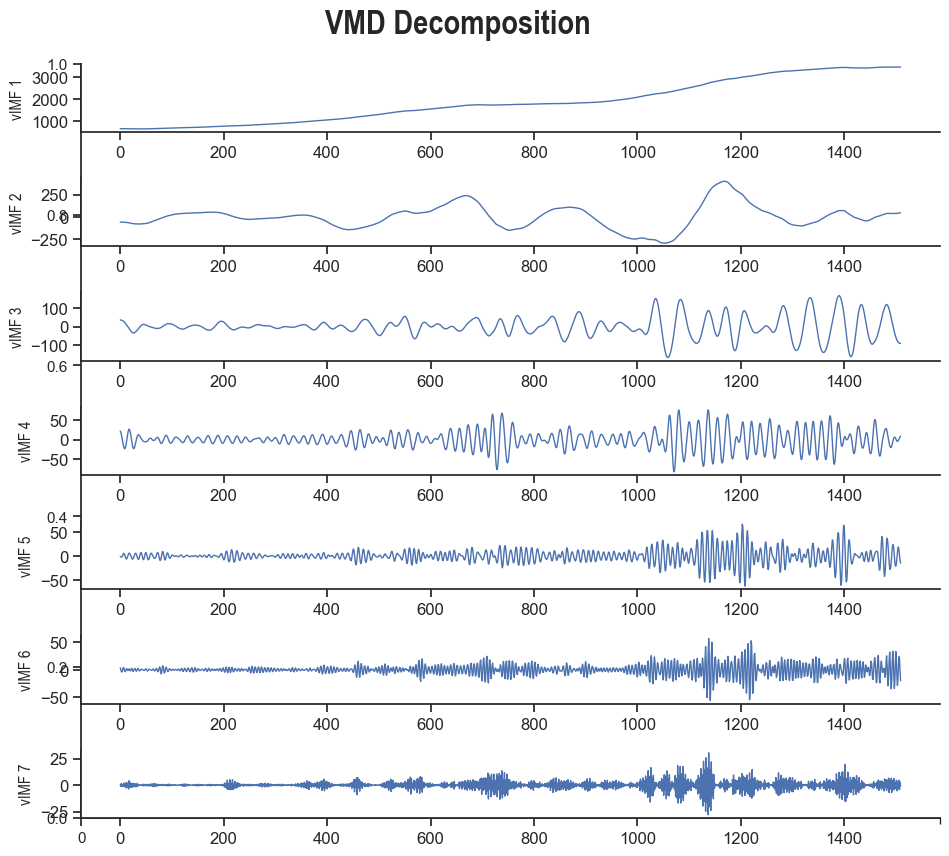

In [19]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 9))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    sns.lineplot(data=imfs.iloc[:, n], linewidth=1, palette=sns.color_palette("Paired")[1])
    sns.despine()
    plt.ylabel("vIMF %i" % (n + 1), fontproperties = font_T_mini)
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('VMD Decomposition', fontproperties = font_T)
plt.tight_layout()
plt.savefig('VMD_result.png', dpi=300, bbox_inches='tight')

# VMD 自己写的

In [20]:
def VMD(signal, alpha, tau, K, DC, init, tol):
    #  标准VMD分解算法
    #  signal  - the time domain signal (1D) to be decomposed
    #  alpha   - the balancing parameter of the data-fidelity constraint
    #  tau     - time-step of the dual ascent ( pick 0 for noise-slack )
    #  K       - the number of modes to be recovered
    #  DC      - true if the first mode is put and kept at DC (0-freq)
    #  init    - 0 = all omegas start at 0
    #                     1 = all omegas start uniformly distributed
    #                     2 = all omegas initialized randomly
    #  tol     - tolerance of convergence criterion; typically around 1e-6
    #
    #  Output:
    #  -------
    #  u       - the collection of decomposed modes
    #  u_hat   - spectra of the modes
    #  omega   - estimated mode center-frequencies

    # Period and sampling frequency of input signal
    save_T = len(signal)
    fs = 1 / float(save_T)
    # extend the signal by mirroring
    T = save_T
    f_mirror = np.zeros(2 * T)
    f_mirror[0:T // 2] = signal[T // 2 - 1::-1]
    f_mirror[T // 2:3 * T // 2] = signal
    f_mirror[3 * T // 2:2 * T] = signal[-1:-T // 2 - 1:-1]
    f = f_mirror
    # Time Domain 0 to T (of mirrored signal)
    T = float(len(f))
    t = np.linspace(1 / float(T), 1, int(T), endpoint=True)
    # Spectral Domain discretization
    freqs = t - 0.5 - 1 / T
    # Maximum number of iterations (if not converged yet, then it won't anyway)
    N = 500
    # For future generalizations: individual alpha for each mode
    Alpha = alpha * np.ones(K, dtype=complex)
    # Construct and center f_hat
    f_hat = np.fft.fftshift(np.fft.fft(f))
    f_hat_plus = f_hat
    f_hat_plus[0:int(int(T) / 2)] = 0
    # matrix keeping track of every iterant // could be discarded for mem
    u_hat_plus = np.zeros((N, len(freqs), K), dtype=complex)
    # Initialization of omega_k
    omega_plus = np.zeros((N, K), dtype=complex)

    if (init == 1):
        for i in range(1, K + 1):
            omega_plus[0, i - 1] = (0.5 / K) * (i - 1)
    elif (init == 2):
        omega_plus[0, :] = np.sort(math.exp(math.log(fs)) + (math.log(0.5) - math.log(fs)) * np.random.rand(1, K))
    else:
        omega_plus[0, :] = 0

    if (DC):
        omega_plus[0, 0] = 0

    # start with empty dual variables
    lamda_hat = np.zeros((N, len(freqs)), dtype=complex)
    # other inits
    uDiff = tol + 2.2204e-16  # updata step
    n = 1  # loop counter
    sum_uk = 0  # accumulator
    T = int(T)

    # ----------- Main loop for iterative updates
    while uDiff > tol and n < N:
        # update first mode accumulator
        k = 1
        sum_uk = u_hat_plus[n - 1, :, K - 1] + sum_uk - u_hat_plus[n - 1, :, 0]
        # update spectrum of first mode through Wiener filter of residuals
        u_hat_plus[n, :, k - 1] = (f_hat_plus - sum_uk - lamda_hat[n - 1, :] / 2) / (
                1 + Alpha[k - 1] * np.square(freqs - omega_plus[n - 1, k - 1]))
        # update first omega if not held at 0
        if DC == False:
            omega_plus[n, k - 1] = np.dot(freqs[T // 2:T],
                                          np.square(np.abs(u_hat_plus[n, T // 2:T, k - 1])).T) / np.sum(
                np.square(np.abs(u_hat_plus[n, T // 2:T, k - 1])))

        for k in range(2, K + 1):
            # accumulator
            sum_uk = u_hat_plus[n, :, k - 2] + sum_uk - u_hat_plus[n - 1, :, k - 1]
            # mode spectrum
            u_hat_plus[n, :, k - 1] = (f_hat_plus - sum_uk - lamda_hat[n - 1, :] / 2) / (
                    1 + Alpha[k - 1] * np.square(freqs - omega_plus[n - 1, k - 1]))
            # center frequencies
            omega_plus[n, k - 1] = np.dot(freqs[T // 2:T],
                                          np.square(np.abs(u_hat_plus[n, T // 2:T, k - 1])).T) / np.sum(
                np.square(np.abs(u_hat_plus[n, T // 2:T:, k - 1])))
        # Dual ascent
        lamda_hat[n, :] = lamda_hat[n - 1, :] + tau * (np.sum(u_hat_plus[n, :, :], axis=1) - f_hat_plus)
        # loop counter
        n = n + 1
        # converged yet?
        uDiff = 2.2204e-16
        for i in range(1, K + 1):
            uDiff = uDiff + 1 / float(T) * np.dot(u_hat_plus[n - 1, :, i - 1] - u_hat_plus[n - 2, :, i - 1], (
                np.conj(u_hat_plus[n - 1, :, i - 1] - u_hat_plus[n - 2, :, i - 1])).conj().T)
        uDiff = np.abs(uDiff)
    # ------ Postprocessing and cleanup
    # discard empty space if converged early
    N = np.minimum(N, n)
    omega = omega_plus[0:N, :]
    # Signal reconstruction
    u_hat = np.zeros((T, K), dtype=complex)
    u_hat[T // 2:T, :] = np.squeeze(u_hat_plus[N - 1, T // 2:T, :])
    u_hat[T // 2:0:-1, :] = np.squeeze(np.conj(u_hat_plus[N - 1, T // 2:T, :]))
    u_hat[0, :] = np.conj(u_hat[-1, :])
    u = np.zeros((K, len(t)), dtype=complex)

    for k in range(1, K + 1):
        u[k - 1, :] = np.real(np.fft.ifft(np.fft.ifftshift(u_hat[:, k - 1])))
    # remove mirror part
    u = u[:, T // 4:3 * T // 4]
    # recompute spectrum
    u_hat = np.zeros((T // 2, K), dtype=complex)
    for k in range(1, K + 1):
        u_hat[:, k - 1] = np.fft.fftshift(np.fft.fft(u[k - 1, :])).conj().T
    u = np.real(u)
    omega = np.real(omega)
    return (u, u_hat, omega)

In [21]:
K = 7  # 7 modes
alpha = 2000  # moderate bandwidth constraint
tau = 0.  # noise-tolerance (no strict fidelity enforcement)
DC = 0  # no DC part imposed
init = 1  # initialize omegas uniformly
tol = 1e-7

# Decomposed modes
u, u_hat, omega = VMD(S, alpha, tau, K, DC, init, tol)
imfs = pd.DataFrame(u).T
imfs.columns = ['imf'+str(i+1) for i in range(K)]
imfs.to_csv('VMD_result.csv', index=False)

nIMFs = imfs.shape[1]  # 子序列的数量

imfs

,imf1,imf2,imf3,imf4,imf5,imf6,imf7
0,652.654813,-57.466588,35.838984,22.028752,-1.037974,3.631527,0.490416
1,652.633055,-57.516883,35.496829,19.289729,-1.611555,0.758086,-1.263742
2,652.622486,-57.583554,34.852745,14.201177,-2.110714,-2.725143,1.478140
3,652.634047,-57.655495,33.920024,7.402539,-1.759651,-4.141216,-1.119981
4,652.635237,-57.766245,32.660983,-0.324407,-0.202301,-2.373956,0.330078
...,...,...,...,...,...,...,...
1505,3464.331398,43.312519,-85.413543,-1.561144,18.983454,7.650960,-3.379081
1506,3464.830250,43.986768,-87.856017,1.153545,12.214646,23.910037,4.565814
1507,3465.399482,44.702489,-89.361510,4.353331,1.458029,18.673982,-4.276415
1508,3465.927169,45.338690,-90.125193,7.263782,-8.867678,-2.202343,2.819719


C:\Windows\Temp\ipykernel_21148\2018214436.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=imfs.iloc[:, n], linewidth=1, palette=sns.color_palette("Paired")[1])
e:\anaconda\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\anaconda\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Windows\Temp\ipykernel_21148\2018214436.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=imfs.iloc[:, n], linewidth=1, palette=sns.color_palette("Paired")[1])
e:\anaconda\envs\pytorch\lib\site-

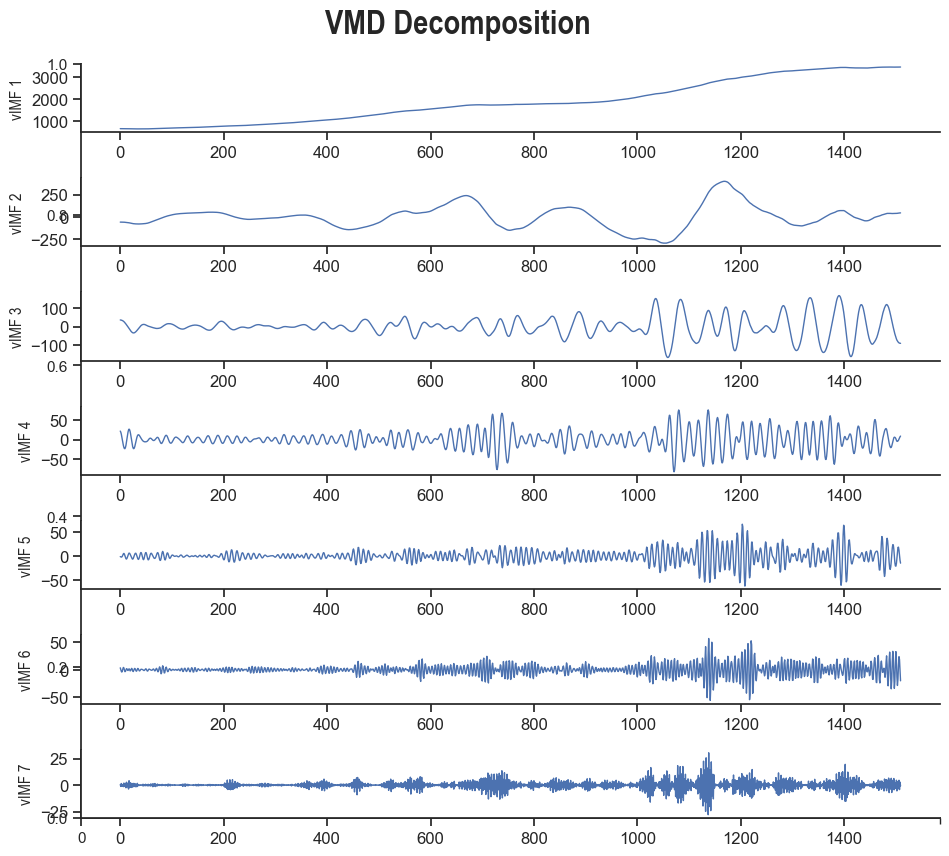

In [22]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 9))
# 设置刻度
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#IMF的图像
for n in range(nIMFs):
    plt.subplot(nIMFs, 1, n + 1)
    sns.lineplot(data=imfs.iloc[:, n], linewidth=1, palette=sns.color_palette("Paired")[1])
    sns.despine()
    plt.ylabel("vIMF %i" % (n + 1), fontproperties = font_T_mini)
    plt.locator_params(axis="y", nbins=3) #调整坐标轴刻度
    plt.xticks(fontproperties = {'family':'Arial'})
    plt.yticks(fontproperties = {'family':'Arial'})
    plt.tight_layout()
plt.suptitle('VMD Decomposition', fontproperties = font_T)
plt.tight_layout()
plt.savefig('VMD_result.png', dpi=300, bbox_inches='tight')

# EWT

In [ ]:
import ewtpy

ewt,  mfb ,boundaries = ewtpy.EWT1D(S, N=3)
df_ewt=pd.DataFrame(ewt)

df_ewt.drop(df_ewt.columns[2],axis=1,inplace=True)
denoised=df_ewt.sum(axis = 1, skipna = True)